## Environment Setup

In [1]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


## Import Libraries

In [2]:
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
output = []

for i in range(29):
    file_name = "./embed_feat/output" + str(i + 1) + ".txt"
    with open(file_name, "rb") as fp:   #Pickling
        file_output = pickle.load(fp)
        for x in file_output:
            output.append(x)
    print(file_name + " done")

X = output
output = []

file_name = []
file_output = []
x = []

print(len(X))

./embed_feat/output1.txt done
./embed_feat/output2.txt done
./embed_feat/output3.txt done
./embed_feat/output4.txt done
./embed_feat/output5.txt done
./embed_feat/output6.txt done
./embed_feat/output7.txt done
./embed_feat/output8.txt done
./embed_feat/output9.txt done
./embed_feat/output10.txt done
./embed_feat/output11.txt done
./embed_feat/output12.txt done
./embed_feat/output13.txt done
./embed_feat/output14.txt done
./embed_feat/output15.txt done
./embed_feat/output16.txt done
./embed_feat/output17.txt done
./embed_feat/output18.txt done
./embed_feat/output19.txt done
./embed_feat/output20.txt done
./embed_feat/output21.txt done
./embed_feat/output22.txt done
./embed_feat/output23.txt done
./embed_feat/output24.txt done
./embed_feat/output25.txt done
./embed_feat/output26.txt done
./embed_feat/output27.txt done
./embed_feat/output28.txt done
./embed_feat/output29.txt done
5740


In [4]:
with open('./embed_labels/label.txt', "rb") as fp:
        y = pickle.load(fp)

print(len(y))

5740


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X = []
y = []

In [6]:
X_train = np.array(X_train)
X_train = X_train.reshape(4592, 158208)

X_val = np.array(X_val)
X_val = X_val.reshape(1148, 158208)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [7]:
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

In [8]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold
 
    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [9]:
'''
model = models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=158208, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
''' 

callback = MyThresholdCallback(threshold=0.70)

model = models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=158208, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(16, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer_fn = tf.keras.optimizers.SGD(learning_rate=0.005)

model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'],
)

In [10]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/1000
144/144 [==============================] - 6s 21ms/step - loss: 0.6956 - accuracy: 0.4956 - val_loss: 0.6934 - val_accuracy: 0.4878
Epoch 2/1000
144/144 [==============================] - 2s 17ms/step - loss: 0.6936 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.4930
Epoch 3/1000
144/144 [==============================] - 2s 17ms/step - loss: 0.6930 - accuracy: 0.5030 - val_loss: 0.6930 - val_accuracy: 0.4948
Epoch 4/1000
144/144 [==============================] - 2s 17ms/step - loss: 0.6932 - accuracy: 0.5094 - val_loss: 0.6928 - val_accuracy: 0.4878
Epoch 5/1000
144/144 [==============================] - 2s 17ms/step - loss: 0.6919 - accuracy: 0.5189 - val_loss: 0.6923 - val_accuracy: 0.4913
Epoch 6/1000
144/144 [==============================] - 2s 17ms/step - loss: 0.6927 - accuracy: 0.5122 - val_loss: 0.6922 - val_accuracy: 0.4913
Epoch 7/1000
144/144 [==============================] - 2s 17ms/step - loss: 0.6920 - accuracy: 0.5174 - val_loss: 0.6918 - val_ac

In [11]:
y_pred = model.predict(X_val)

In [12]:
y_pred = (y_pred > 0.5).astype('int64')
y_pred = y_pred.reshape(len(y_pred))

In [13]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       571
           1       0.70      0.70      0.70       577

    accuracy                           0.70      1148
   macro avg       0.70      0.70      0.70      1148
weighted avg       0.70      0.70      0.70      1148



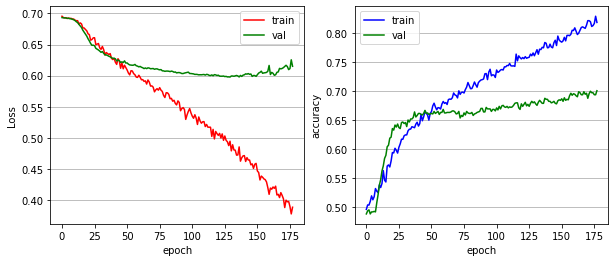

In [14]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
# plt.savefig("cifar10_training_val_no_dropout")

In [15]:
model = []
y_pred = []

## Train on complete Data

In [3]:
output = []

for i in range(29):
    file_name = "./embed_feat/output" + str(i + 1) + ".txt"
    with open(file_name, "rb") as fp:   #Pickling
        file_output = pickle.load(fp)
        for x in file_output:
            output.append(x)
    print(file_name + " done")

X = output
output = []

file_name = []
file_output = []
x = []

print(len(X))

./embed_feat/output1.txt done
./embed_feat/output2.txt done
./embed_feat/output3.txt done
./embed_feat/output4.txt done
./embed_feat/output5.txt done
./embed_feat/output6.txt done
./embed_feat/output7.txt done
./embed_feat/output8.txt done
./embed_feat/output9.txt done
./embed_feat/output10.txt done
./embed_feat/output11.txt done
./embed_feat/output12.txt done
./embed_feat/output13.txt done
./embed_feat/output14.txt done
./embed_feat/output15.txt done
./embed_feat/output16.txt done
./embed_feat/output17.txt done
./embed_feat/output18.txt done
./embed_feat/output19.txt done
./embed_feat/output20.txt done
./embed_feat/output21.txt done
./embed_feat/output22.txt done
./embed_feat/output23.txt done
./embed_feat/output24.txt done
./embed_feat/output25.txt done
./embed_feat/output26.txt done
./embed_feat/output27.txt done
./embed_feat/output28.txt done
./embed_feat/output29.txt done
5740


In [4]:
with open('./embed_labels/label.txt', "rb") as fp:
        y = pickle.load(fp)

print(len(y))

5740


In [5]:
X = np.array(X)
X = X.reshape(5740, 158208)
y = np.array(y)

In [6]:
X = StandardScaler().fit_transform(X)

In [9]:
model = models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=158208, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(16, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer_fn = tf.keras.optimizers.SGD(learning_rate=0.005)

model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'],
)

In [10]:
history = model.fit(X, y, epochs = 200, batch_size = 32)

Epoch 1/200
180/180 [==============================] - 6s 15ms/step - loss: 0.6946 - accuracy: 0.4972
Epoch 2/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6923 - accuracy: 0.5179
Epoch 3/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6909 - accuracy: 0.5197
Epoch 4/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6903 - accuracy: 0.5235
Epoch 5/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6888 - accuracy: 0.5376
Epoch 6/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6882 - accuracy: 0.5402
Epoch 7/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6872 - accuracy: 0.5303
Epoch 8/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6805 - accuracy: 0.5575
Epoch 9/200
180/180 [==============================] - 3s 15ms/step - loss: 0.6809 - accuracy: 0.5505
Epoch 10/200
180/180 [==============================] - 3s 15ms/step - loss: 0.676

## Save Model to Disk

In [12]:
model.save('./nn_model')

INFO:tensorflow:Assets written to: ./nn_model/assets


## Load Model from Disk

In [14]:
model1 = tf.keras.models.load_model('./nn_model')

## Load Training Data from Disk

In [16]:
X_test = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/X_test.sav", "rb"))

In [18]:
X_test = StandardScaler().fit_transform(X_test)

In [24]:
y_pred = model.predict(X_test)
print(y_pred) 

[[0.0863409 ]
 [0.12175   ]
 [0.13569932]
 ...
 [0.16165873]
 [0.8414782 ]
 [0.77845   ]]


In [25]:
y_pred = (y_pred > 0.5).astype('int64')
y_pred = y_pred.reshape(len(y_pred)) 

In [26]:
print(y_pred)

[0 0 0 ... 0 1 1]


In [29]:
len(y_pred)

1348

In [30]:
y_test = []

for i in range(len(y_pred)):
  if y_pred[i] == 0:
    y_test.append('NONE')
  else:
    y_test.append('HOF')

In [31]:
print(y_test)

['NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'HOF', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'HOF', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'NONE', 'HOF', 'HOF', 'HOF', 'NONE', 'NONE', 'HOF', 'HOF', 'NONE', 'HOF', 'NONE', 'NONE', 'HOF', 'NONE', 'HOF', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'HOF', 'NONE', 'HOF', 'HO

## Loading Test Tweets

In [34]:
! git clone https://github.com/bhargav25dave1996/ICHCL_baseline.git
% cd /content/drive/MyDrive/Colab Notebooks/ICHCL_baseline

fatal: destination path 'ICHCL_baseline' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/ICHCL_baseline


In [47]:
import pickle
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
from glob import glob
import re
import json

import time
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout


from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import stemmer as hindi_stemmer

import torch
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
english_stopwords = stopwords.words("english")
with open('final_stopwords.txt', encoding = 'utf-8') as f:
    hindi_stopwords = f.readlines()
    for i in range(len(hindi_stopwords)):
        hindi_stopwords[i] = re.sub('\n','',hindi_stopwords[i])
stopwords = english_stopwords + hindi_stopwords
english_stemmer = SnowballStemmer("english")

In [49]:
test_directories = []
for i in glob("/content/drive/MyDrive/Colab Notebooks/subtask2_test/*/"):
    for j in glob(i+'*/'):
        test_directories.append(j)

In [50]:
data = []
for i in test_directories:
    with open(i+'data.json', encoding='utf-8') as f:
        data.append(json.load(f))

In [51]:
def te_flatten(d):
    flat_text = []
    flat_text.append({
        'tweet_id':d['tweet_id'],
        'text':d['tweet'],
    })

    for i in d['comments']:
            flat_text.append({
                'tweet_id':i['tweet_id'],
                'text':flat_text[0]['text'] + i['tweet'],
            })
            if 'replies' in i.keys():
                for j in i['replies']:
                    flat_text.append({
                        'tweet_id':j['tweet_id'],
                        'text':flat_text[0]['text'] + i['tweet'] + j['tweet'],
                    })
    return flat_text

In [52]:
test_tweetid_data = []
#for test
for i in range(len(data)):
    for j in te_flatten(data[i]):
        test_tweetid_data.append(j)

In [53]:
test_tweetid_data = []
#for test
for i in range(len(data)):
    for j in te_flatten(data[i]):
        test_tweetid_data.append(j)

In [54]:
test_df = pd.DataFrame(test_tweetid_data, columns = test_tweetid_data[0].keys(), index = None)

In [55]:
test_df.head()

,tweet_id,text
0,1392808101007478794,"In Gujarat, some believers have been going to ..."
1,1392808747928539137,"In Gujarat, some believers have been going to ..."
2,1392808849762000898,"In Gujarat, some believers have been going to ..."
3,1392836845361242121,"In Gujarat, some believers have been going to ..."
4,1392900440409337857,"In Gujarat, some believers have been going to ..."


In [56]:
y_test = np.array(y_test)
tweet_id = test_df['tweet_id']
tweet_id = np.array(tweet_id)

In [57]:
submission = {'tweet_id': tweet_id, 'label':y_test}
submission = pd.DataFrame(submission)

In [58]:
submission.head()

,tweet_id,label
0,1392808101007478794,NONE
1,1392808747928539137,NONE
2,1392808849762000898,NONE
3,1392836845361242121,NONE
4,1392900440409337857,NONE


In [59]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/nn_submission.csv', index = False)